# Actividad


---
Por: Ángela Córdoba


---




Las redes neuronales recurrentes son un tipo de red neuronal artificial diseñadas para procesar secuencias de datos, donde la salida de cada paso de tiempo se utiliza como entrada para el siguiente paso. Se usan principalmente para datos de tipo imagen.

In [1]:
# Importar bibliotecas necesarias
import pandas as pd

In [2]:
# Importar conjunto de datos
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# Descripción del dataset
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [4]:
# Recuento de valores únicos en la columna 'sentiment'
# Permite ver cuántas revisiones están etiquetadas como positivas o negativas
print("Total :\n", df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Preprocesamiento de las secuencias

In [5]:
# Inicialización de listas
review = []

# Bucle de iteración para almacenar revisiones
sentences = list(df['review'])
for sen in sentences:
  review.append(sen)

In [6]:
# Creación de etiquetas
import numpy as np

labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [7]:
# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

In [8]:
# Parámetros
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = "post"
oov_tok = "<OOV>"

In [9]:
# Tokenización y acolchado de secuencias
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(train_sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

In [10]:
# Construcción del modelo
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo (arquitectura de la red neuronal, número de parámetros, flujo de datos)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 103ms/step - accuracy: 0.6089 - loss: 0.6429 - val_accuracy: 0.7146 - val_loss: 0.6024
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 96ms/step - accuracy: 0.7206 - loss: 0.5679 - val_accuracy: 0.7422 - val_loss: 0.5365
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 94ms/step - accuracy: 0.7616 - loss: 0.5114 - val_accuracy: 0.7809 - val_loss: 0.4702
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 95ms/step - accuracy: 0.7991 - loss: 0.4612 - val_accuracy: 0.8046 - val_loss: 0.4423
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 95ms/step - accuracy: 0.8127 - loss: 0.4310 - val_accuracy: 0.8008 - val_loss: 0.4325
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 97ms/step - accuracy: 0.8221 - loss: 0.4066 - val_accuracy: 0.8186 - val_loss: 0.4020
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 98ms/step - accuracy: 0.8315 - loss: 0.3818 - val_accuracy: 0.8208 - val_loss: 0.4050
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 93ms/step - accuracy:

<Axes: >

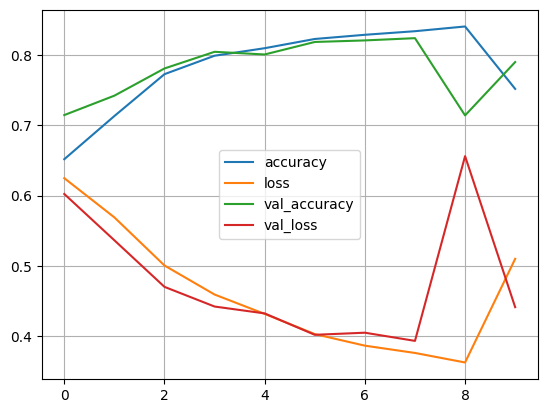

In [12]:
# Entrenamiento del modelo
num_epochs = 10
history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
Accuracy: 0.79
Precision: 0.7943025662659262
Recall: 0.79
F1 Score: 0.7992735614605236
Matriz de confusión: [[3719 1342]
 [ 758 4181]]


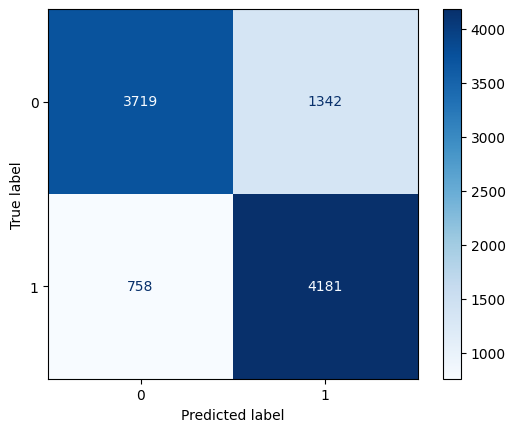

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(testing_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular métricas de evaluación
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
print('Matriz de confusión:', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


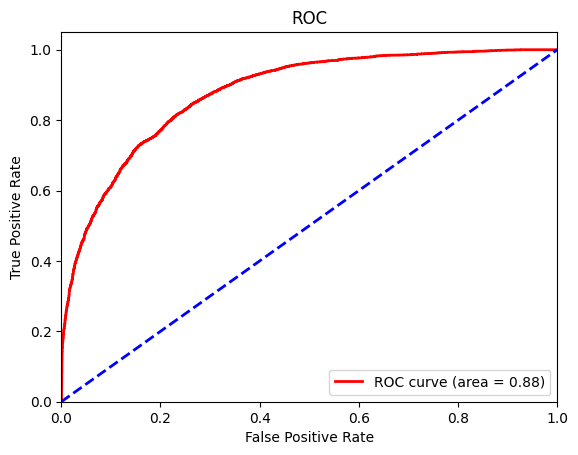

AUC: 0.88


In [14]:
from sklearn.metrics import roc_curve, auc

# Probabilidades de las predicciones
y_prob = model.predict(testing_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

### Preguntas

1. ¿Qué tipo de modelo de red neuronal se construye en el código?
> Una RNN bidireccional con capas LSTM.

2. ¿Cuál es la función de activación utilizada en la capa de salida y por qué se elige esta función para
este problema?
> Se usa la función sigmoide porque es adecuada para problemas de clasificación binaria.

3. ¿Cuál es la diferencia entre una capa LSTM bidireccional y una capa LSTM unidireccional?
> La primera procesa la secuencia en ambas direcciones (adelante y atrás) y la segunda solo lo hace en una dirección (adelante).

4. ¿Qué significan los parámetros return_sequences=True en la primera capa LSTM bidireccional?
> Que la capa LSTM debe devolver la secuencia completa de salidas en cada paso.

5. ¿Qué función de pérdida se utiliza en el modelo y por qué es adecuada para problemas de
clasificación binaria?
> Se usa 'binary_crossentropy' porque mide la diferencia entre las predicciones del modelo y las etiquetas.

6. ¿Qué métrica se utiliza para evaluar el rendimiento del modelo durante el entrenamiento?
> Se usa 'accuracy' o precisión/exactitud.

7. ¿Por qué se utilizan dos capas LSTM bidireccionales en el modelo?
> Porque permite mejorar la capacidad del modelo: entiende características básicas y luego permite una mejor comprensión del contexto.

8. ¿Qué hace la capa de embedding en el modelo y por qué es necesaria?
> Convierte los enteros positivos en vectores densos y se usa porque transforma las palabras en una forma que el modelo pueda entender numéricamente y que ayuda a mejorar la capacidad para aprender modelo en los datos al captar relaciones semánticas entre palabras.



